# Deep Learning 


We'll cover the following:
- Quiz and task on cifar10 data
- transfer learning models
- cifar10 using transfer learning
- Freshwater Fish Disease Aquaculture in south asia Dataset using transfer learning
- Evaluation: accuracy, confusion matrix, ROC curves  

# Quiz

## Multiple‑Choice Questions

1. **enter 32\*32 Image with size 5*5 The step size of the convolution kernel is 1 Convolution calculation, output image Size is:**  
   - A. 28*3  
   - B. 28*28  
   - C. 29*29  
   - D. 23*23  



2. **the following code was used when compiling the model:**
``` python model.compile(optimizer='Adam, loss='categorical.crossentropy',metrics=[tf.keras.metri cs.accuracy])```,

 currently using evaluate When the method evaluates the model, which of the following indicators will be output? (Multiple choice)
   - A. accuracy
   - B. categorical_loss  
   - C. loss  
   - D. categorical accuracy 

3. **At a convolution layer of a convolutional neural network, assume there are 128 3 x 3 convolution kernels and the size of the input feature map is 28 x 28 x 64. The depth of a convolution kernel is ().**  
   - A. 128 
   - B. 28  
   - C. 3  
   - D. 64  

4. **A small CNN model:**

    - Conv1: 3×3, in_ch=3, out_ch=32

    - Conv2: 3×3, in_ch=32, out_ch=64

    - Flatten: (8×8×64)

    - Dense: 512 units

    - Output: 10 units
  
How many total parameters in Conv1 + Conv2 only?

    - A. 896 + 18,496 = 19,392
    - B. 864 + 18,432 = 19,296
    - C. 896 + 18,432 = 19,328
    - D. 832 + 18,496 = 19,328
     


5. **If shuffle=True is mistakenly enabled during testing, and you compute model accuracy, what kind of error could appear?**

   - A. The model will predict random outputs
   - B. Accuracy may be computed using mismatched image–label pairs
   - C. The generator will skip some images
   - D. The confusion matrix will show perfect classification


---

6. **During training, why is it mathematically beneficial to shuffle batches between epochs?**

   - A. It helps ensure that gradient updates are unbiased by data ordering
   - B. It increases the total number of training samples
   - C. It reduces the need for data augmentation
   - D. It stabilizes the learning rate schedule

7. **A convolutional layer has:**

    - kernel size = 3 × 3
    - input channels = 3
    - output filters = 32
    - bias = True
How many trainable parameters does this layer have?**

    - A. 288
    - B. 896
    - C. 832
    - D. 320

8. **Which of the following layers do not have trainable parameters?**
    
    - A. Dense
    - B. Conv2D
    - C. MaxPooling2D
    - D. BatchNormalization

9. **In an ImageDataGenerator used for training, the first index refers to the batch, while the second index (e.g., [0] or [1]) typically refers to:**  
   - A. The type of data (image or label) in that batch
   - B. The specific image number in the full dataset
   - C. The total number of epochs completed
   - D. The number of augmentation operations applied


10. **Input: (batch=8, H=64, W=64, C=16)
    Layer: Conv2D(filters=64, kernel_size=5×5, strides=1, padding='same')
What is the output shape?**

    - A. (8, 60, 60, 64)
    - B. (8, 64, 64, 64)
    - C. (8, 62, 62, 64)
    - D. (8, 32, 32, 64)


# cifar10 task

In [2]:
# load cifar data
from keras.datasets import cifar10

<details><summary>Click here for the solution</summary>

```python
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

```

</details>


[6]


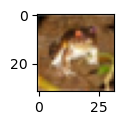

In [3]:
import matplotlib.pyplot as plt
print(y_train[0])
plt.figure(figsize=(1,1))
plt.imshow(x_train[0],cmap="gray")

In [2]:
# normalizes the image so that all pixel values fall within the [0, 1] range


<details><summary>Click here for the solution</summary>

```python
x_train = x_train/255
x_test = x_test/255

```

</details>


In [12]:
# build CNN model 
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout,Conv2D,Flatten,MaxPool2D

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 324,970 (1.24 MB)

 Trainable params: 324,970 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

<details><summary>Click here for the solution</summary>

```python
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.summary()
```

</details>


In [13]:
# compile model use loss SparseCategoricalCrossentropy and adam optimizer and metrics accuracy


<details><summary>Click here for the solution</summary>

```python
model.compile(loss="SparseCategoricalCrossentropy",optimizer="adam",metrics=["accuracy"])
```

</details>


In [14]:
# train the model using x_train and y_train on 10 epoch take 0.2 validation data and batch size 32
history = model.fit(x_train,y_train,validation_split=0.2,epochs=5)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.5199 - loss: 1.3581 - val_accuracy: 0.6303 - val_loss: 1.0651
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6718 - loss: 0.9477 - val_accuracy: 0.6791 - val_loss: 0.9275
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.7358 - loss: 0.7628 - val_accuracy: 0.6860 - val_loss: 0.9236
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.7872 - loss: 0.6169 - val_accuracy: 0.6893 - val_loss: 0.9495
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.8314 - loss: 0.4859 - val_accuracy: 0.6873 - val_loss: 1.0270


<details><summary>Click here for the solution</summary>

```python
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2,batch_size=32)
```

</details>


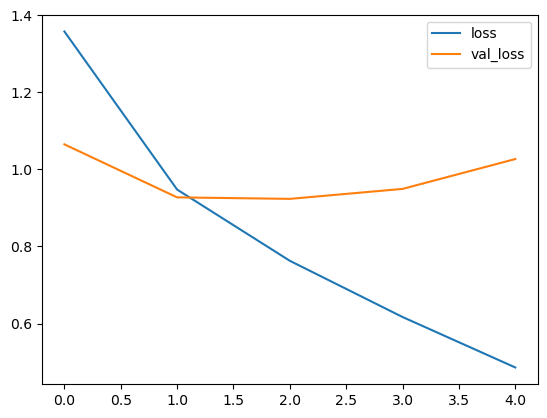

In [15]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss","val_loss"])


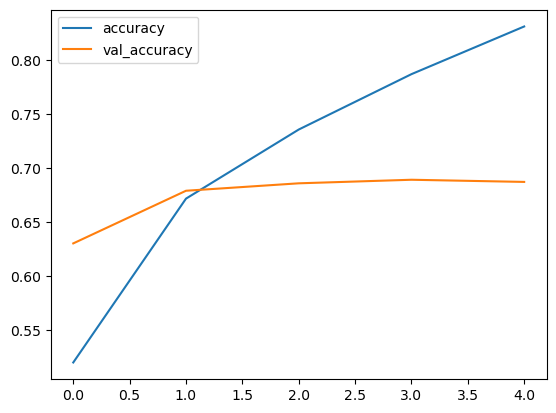

In [16]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])

plt.show()

In [17]:
# evaluate on test data


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6844 - loss: 1.0379


[1.0379087924957275, 0.6844000220298767]

<details><summary>Click here for the solution</summary>

```python
model.evaluate(x_test,y_test)
```

</details>


# transfer learning

| Year     | Model                        | # Convolution Layers | # Fully Connected Layers | Dataset Used for Training                              | Notes                                              |
| -------- | ---------------------------- | -------------------- | ------------------------ | ------------------------------------------------------ | -------------------------------------------------- |
| **1998** | **LeNet-5**                  | 2                    | 3                        | **MNIST** (handwritten digits, 10 classes)             | First successful CNN for digit recognition.        |
| **2012** | **AlexNet**                  | 5                    | 3                        | **ImageNet (ILSVRC 2012)** — 1.2M images, 1000 classes | Big breakthrough using GPUs, ReLU, and dropout.    |
| **2014** | **VGG-16 / VGG-19**          | 13 / 16              | 3                        | **ImageNet (ILSVRC 2014)**                             | Used small 3×3 conv filters, very deep and simple. |
| **2014** | **GoogLeNet (Inception v1)** | 22                   | 1                        | **ImageNet (ILSVRC 2014)**                             | Introduced Inception modules (1×1, 3×3, 5×5).      |
| **2015** | **ResNet-50 / 101 / 152**    | 49 / 100 / 151       | 1                        | **ImageNet (ILSVRC 2015)**                             | Introduced skip connections (residual learning).   |
| **2015** | **Inception-v3**             | 48                   | 1                        | **ImageNet (ILSVRC 2015)**                             | Improved GoogLeNet with factorized convolutions.   |
| **2016** | **DenseNet-121 / 169 / 201** | 120 / 168 / 200      | 1                        | **ImageNet**                                           | Dense connections between all layers.              |
| **2017** | **Xception**                 | 36                   | 1                        | **ImageNet**                                           | Depthwise separable convolutions (like MobileNet). |
| **2017** | **MobileNet-v1**             | 28                   | 1                        | **ImageNet**                                           | Lightweight CNN for mobile devices.                |
| **2018** | **EfficientNet-B0 → B7**     | ~25–40               | 1                        | **ImageNet**                                           | Scaled depth/width/resolution efficiently.         |
| **2021** | **ConvNeXt**                 | 53                   | 1                        | **ImageNet-22K (pretrained)**                          | CNN designed to match Transformer accuracy.        |


## mobileNet Transfer Learning

In [5]:
from tensorflow.keras.applications import mobilenet

base_model = mobilenet.MobileNet(
    include_top=False, # do not need input layer
    weights='imagenet',
    input_shape=(32, 32, 3)
)

base_model.trainable = False

# Model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

C:\Users\hossam\AppData\Local\Temp\ipykernel_11236\2265270733.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = mobilenet.MobileNet(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 1, 1, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,295,114 (12.57 MB)

 Trainable params: 66,250 (258.79 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,validation_split=0.2, epochs=5)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 0.2025 - loss: 2.1887 - val_accuracy: 0.2264 - val_loss: 2.1492
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.2224 - loss: 2.1458 - val_accuracy: 0.2252 - val_loss: 2.1430
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.2275 - loss: 2.1356 - val_accuracy: 0.2304 - val_loss: 2.1334
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.2297 - loss: 2.1283 - val_accuracy: 0.2298 - val_loss: 2.1337
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.2315 - loss: 2.1235 - val_accuracy: 0.2286 - val_loss: 2.1268


#### Input Size Issue
 - MobileNet (pretrained on ImageNet) expects input ≥ 96×96, typically (224, 224, 3).
 - Using (32,32,3) works syntactically, but it won’t match the feature scale the model learned, giving poor results.

In [5]:
import tensorflow as tf
x_train = tf.image.resize(x_train, (96, 96))
x_test = tf.image.resize(x_test, (96, 96))

In [31]:
from tensorflow.keras.applications import mobilenet
base_model = mobilenet.MobileNet(
    include_top=False, # do not need input layer
    weights='imagenet',
    input_shape=(96, 96, 3)
)

base_model.trainable = False

# Model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

C:\Users\hossam\AppData\Local\Temp\ipykernel_1276\2330625815.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = mobilenet.MobileNet(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 3, 3, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,819,402 (14.57 MB)

 Trainable params: 590,538 (2.25 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,validation_split=0.2, epochs=5)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 114s 89ms/step - accuracy: 0.7697 - loss: 0.7033 - val_accuracy: 0.8125 - val_loss: 0.5637
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 108s 86ms/step - accuracy: 0.8549 - loss: 0.4142 - val_accuracy: 0.8149 - val_loss: 0.5802
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 110s 88ms/step - accuracy: 0.8915 - loss: 0.3090 - val_accuracy: 0.8171 - val_loss: 0.6080
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 110s 88ms/step - accuracy: 0.9171 - loss: 0.2376 - val_accuracy: 0.8167 - val_loss: 0.6353
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 108s 87ms/step - accuracy: 0.9350 - loss: 0.1825 - val_accuracy: 0.8163 - val_loss: 0.7662


In [33]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.8148 - loss: 0.7611


[0.7611487507820129, 0.8148000240325928]

#### if we want to set some layer network to be non-trainable and some trainable

In [6]:
# 28 = (1 standard conv + 13 depthwise + 13 pointwise + 1 FC)
for i, layer in enumerate(base_model.layers):
    print(i, layer.name, layer.trainable)

0 input_layer_2 False
1 conv1 False
2 conv1_bn False
3 conv1_relu False
4 conv_dw_1 False
5 conv_dw_1_bn False
6 conv_dw_1_relu False
7 conv_pw_1 False
8 conv_pw_1_bn False
9 conv_pw_1_relu False
10 conv_pad_2 False
11 conv_dw_2 False
12 conv_dw_2_bn False
13 conv_dw_2_relu False
14 conv_pw_2 False
15 conv_pw_2_bn False
16 conv_pw_2_relu False
17 conv_dw_3 False
18 conv_dw_3_bn False
19 conv_dw_3_relu False
20 conv_pw_3 False
21 conv_pw_3_bn False
22 conv_pw_3_relu False
23 conv_pad_4 False
24 conv_dw_4 False
25 conv_dw_4_bn False
26 conv_dw_4_relu False
27 conv_pw_4 False
28 conv_pw_4_bn False
29 conv_pw_4_relu False
30 conv_dw_5 False
31 conv_dw_5_bn False
32 conv_dw_5_relu False
33 conv_pw_5 False
34 conv_pw_5_bn False
35 conv_pw_5_relu False
36 conv_pad_6 False
37 conv_dw_6 False
38 conv_dw_6_bn False
39 conv_dw_6_relu False
40 conv_pw_6 False
41 conv_pw_6_bn False
42 conv_pw_6_relu False
43 conv_dw_7 False
44 conv_dw_7_bn False
45 conv_dw_7_relu False
46 conv_pw_7 False
47 conv_pw

In [41]:
from tensorflow.keras.applications import mobilenet
base_model = mobilenet.MobileNet(
    include_top=False, # do not need input layer
    weights='imagenet',
    input_shape=(96, 96, 3)
)

# or if we want to set the first 20 layers of the network to be non-trainable
for layer in base_model.layers[:20]:
    layer.trainable = False
for layer in base_model.layers[20:]:
    layer.trainable = True
# Model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

C:\Users\hossam\AppData\Local\Temp\ipykernel_1276\4073634825.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = mobilenet.MobileNet(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 3, 3, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,819,402 (14.57 MB)

 Trainable params: 3,783,498 (14.43 MB)

 Non-trainable params: 35,904 (140.25 KB)

In [42]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,validation_split=0.2, epochs=1,batch_size=128)

313/313 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.8086 - loss: 0.6264 - val_accuracy: 0.7657 - val_loss: 0.8737


In [43]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.7575 - loss: 0.9086


[0.9085872173309326, 0.7574999928474426]

In [44]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(
    include_top=False, # do not need input layer
    weights='imagenet',
    input_shape=(96, 96, 3)
)

base_model.trainable = False

# Model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 3, 3, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │         294,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,010,314 (57.26 MB)

 Trainable params: 295,626 (1.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [45]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,validation_split=0.2, epochs=1,batch_size=128)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1096s 3s/step - accuracy: 0.6443 - loss: 1.0475 - val_accuracy: 0.7097 - val_loss: 0.8484


In [46]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 216s 690ms/step - accuracy: 0.7156 - loss: 0.8430


[0.8429983258247375, 0.7156000137329102]

# Real World Example in Freshwater Fish Disease Aquaculture in south asia Dataset

## 1. Constants

In [10]:
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS = 3
EPOCHS = 50
PATH = r'E:\BFCAI\2025 first term\BNU 2025\deep learning\my labs\lab 2\Freshwater Fish Disease Aquaculture in south asia'

## 2. load data in dataframe

In [6]:
import os
from tqdm import tqdm
image_paths_train = []
image_class_train = []
image_paths_test = []
image_class_test = []
for folder in tqdm(os.listdir(PATH)):
    for class_name in os.listdir(PATH+"\\"+folder):
        for image in os.listdir(PATH+"\\"+folder+"\\"+class_name):
            if folder=="Train":
                image_paths_train.append(PATH+"\\"+folder+"\\"+class_name+"\\"+image)
                image_class_train.append(class_name)
            else:
                image_paths_test.append(PATH+"\\"+folder+"\\"+class_name+"\\"+image)
                image_class_test.append(class_name)

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 355.52it/s]


In [7]:
import pandas as pd
df_train = pd.DataFrame({"image_path":image_paths_train,"label":image_class_train})
df_test = pd.DataFrame({"image_path":image_paths_test,"label":image_class_test})
df_train.to_csv("df_train.csv")
df_test.to_csv("df_test.csv")
df_train.head()

,image_path,label
0,E:\BFCAI\2025 first term\BNU 2025\deep learnin...,Bacterial diseases - Aeromoniasis
1,E:\BFCAI\2025 first term\BNU 2025\deep learnin...,Bacterial diseases - Aeromoniasis
2,E:\BFCAI\2025 first term\BNU 2025\deep learnin...,Bacterial diseases - Aeromoniasis
3,E:\BFCAI\2025 first term\BNU 2025\deep learnin...,Bacterial diseases - Aeromoniasis
4,E:\BFCAI\2025 first term\BNU 2025\deep learnin...,Bacterial diseases - Aeromoniasis


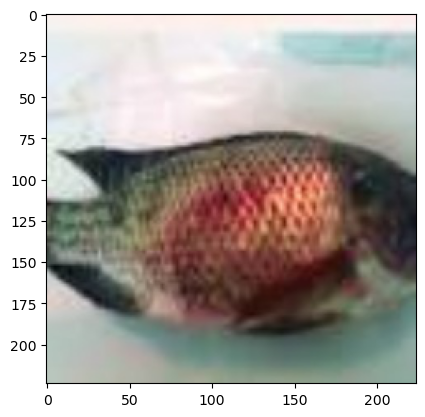

In [9]:
import matplotlib.pyplot as plt
im = plt.imread(df_train["image_path"][0])
plt.imshow(im)

In [10]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df_train, test_size=0.2, random_state=42)

## 3. Importing data into a ImageDataGenerator dataset object

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_test = ImageDataGenerator(rescale=1./255)  # normalize pixels to [0,1]
datagen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=30,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')  # normalize pixels to [0,1]
train_generator = datagen_train.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='label',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='categorical'  # or 'binary', 'sparse' depending on label format
)

Found 1397 validated image filenames belonging to 7 classes.


C:\Users\hossam\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 3 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
valid_generator = datagen_test.flow_from_dataframe(
    dataframe=val_df,
    x_col='image_path',
    y_col='label',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical'  # or 'binary', 'sparse' depending on label format
)

Found 350 validated image filenames belonging to 7 classes.


In [13]:
test_generator = datagen_test.flow_from_dataframe(
    dataframe=df_test,
    x_col='image_path',
    y_col='label',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical'  # or 'binary', 'sparse' depending on label format
)

Found 697 validated image filenames belonging to 7 classes.


C:\Users\hossam\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 3 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


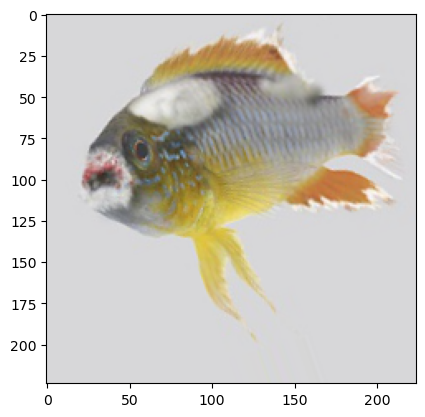

In [14]:
# 10 is batch number, 0 mean images and 31 is image number can not exceed 31
plt.imshow(train_generator[10][0][31])

In [15]:
# 10 is batch number, 1 mean classes and 31 is image class number can not exceed 31
train_generator[1][1][31]

array([0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
class_names = list(train_generator.class_indices.keys())

## Visualizing the first batch of images 

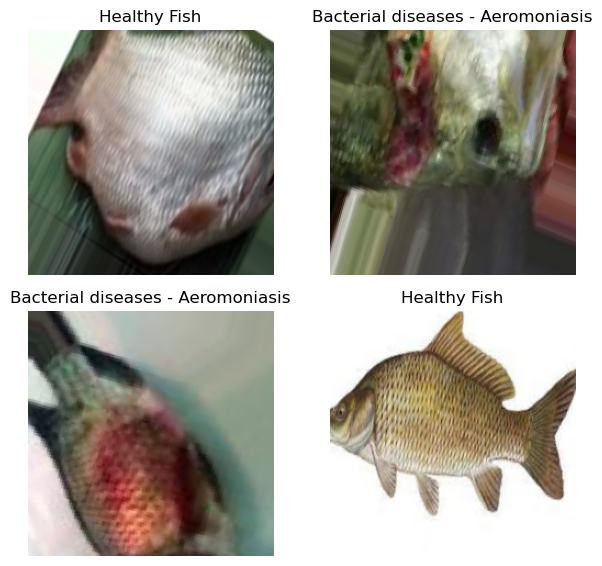

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(train_generator[0][0][i])
    plt.title(class_names[(train_generator[0][1][i]).argmax()])
    plt.tight_layout()
    plt.axis("off")

##  4. Build and Train CNN

We build a simple CNN with two convolutional layers, followed by dense layers and a softmax output.
This model will serve as a baseline for comparing with more complex models.


In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input

In [19]:
cnn_model = Sequential()
cnn_model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
cnn_model.add(Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(7, activation='softmax'))
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,797,191 (182.33 MB)

 Trainable params: 47,797,191 (182.33 MB)

 Non-trainable params: 0 (0.00 B)

In [506]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(train_generator, validation_data=valid_generator, epochs=10)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.1629 - loss: 7.7221 - val_accuracy: 0.2429 - val_loss: 1.7902
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.2709 - loss: 1.8073 - val_accuracy: 0.2743 - val_loss: 1.8061
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.3098 - loss: 1.7288 - val_accuracy: 0.3914 - val_loss: 1.6369
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.3717 - loss: 1.6919 - val_accuracy: 0.4514 - val_loss: 1.5415
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.4400 - loss: 1.5401 - val_accuracy: 0.3800 - val_loss: 1.6951
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.4091 - loss: 1.5386 - val_accuracy: 0.4857 - val_loss: 1.4710
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.4415 - loss: 1.4805 - val_accuracy: 0.4829 - val_loss: 1.4859
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.4896 - loss: 1.4539 - val_accuracy: 0.4943 - val_loss:

In [507]:
cnn_model.evaluate(test_generator)

22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.5509 - loss: 1.3488


[1.2992666959762573, 0.5695839524269104]

## 5. mobileNet Transfer Learning

In [68]:
from tensorflow.keras.applications import mobilenet
# ResNet50
base_model = mobilenet.MobileNet(
    include_top=False, # do not need input layer
    weights='imagenet',
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)
)

base_model.trainable = False

# Model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(384, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 384)                 │      19,267,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           2,695 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,499,527 (85.83 MB)

 Trainable params: 19,270,663 (73.51 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [70]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, validation_data=valid_generator, epochs=10)

C:\Users\hossam\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.2531 - loss: 32.8340 - val_accuracy: 0.4429 - val_loss: 1.4584
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.5623 - loss: 1.2067 - val_accuracy: 0.6457 - val_loss: 1.0925
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.6917 - loss: 0.8312 - val_accuracy: 0.7057 - val_loss: 1.0801
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.8026 - loss: 0.5967 - val_accuracy: 0.6886 - val_loss: 0.8966
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.8451 - loss: 0.4765 - val_accuracy: 0.7571 - val_loss: 0.7639
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.8814 - loss: 0.3860 - val_accuracy: 0.7771 - val_loss: 0.8362
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.8811 - loss: 0.3591 - val_accuracy: 0.7657 - val_loss: 0.9028
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.8829 - loss: 0.3494 - val_accuracy: 0.7543 - val_los

## 6. evaluate Model

In [72]:
# Scikit-learn
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    recall_score, 
    precision_score, 
    confusion_matrix
)

pred = model.predict(test_generator)
# Get predicted class indices
y_pred = pred.argmax(axis=1)

accuracy = accuracy_score(y_pred, test_generator.classes)
f1 = f1_score(y_pred, test_generator.classes, average='weighted')
recall = recall_score(y_pred, test_generator.classes, average='weighted')
precision = precision_score(y_pred, test_generator.classes, average='weighted')

print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Recall: ", recall)
print("Precision: ", precision)

C:\Users\hossam\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 749ms/step
Accuracy:  0.926829268292683
F1 Score:  0.9261085414636159
Recall:  0.926829268292683
Precision:  0.9319768078214438


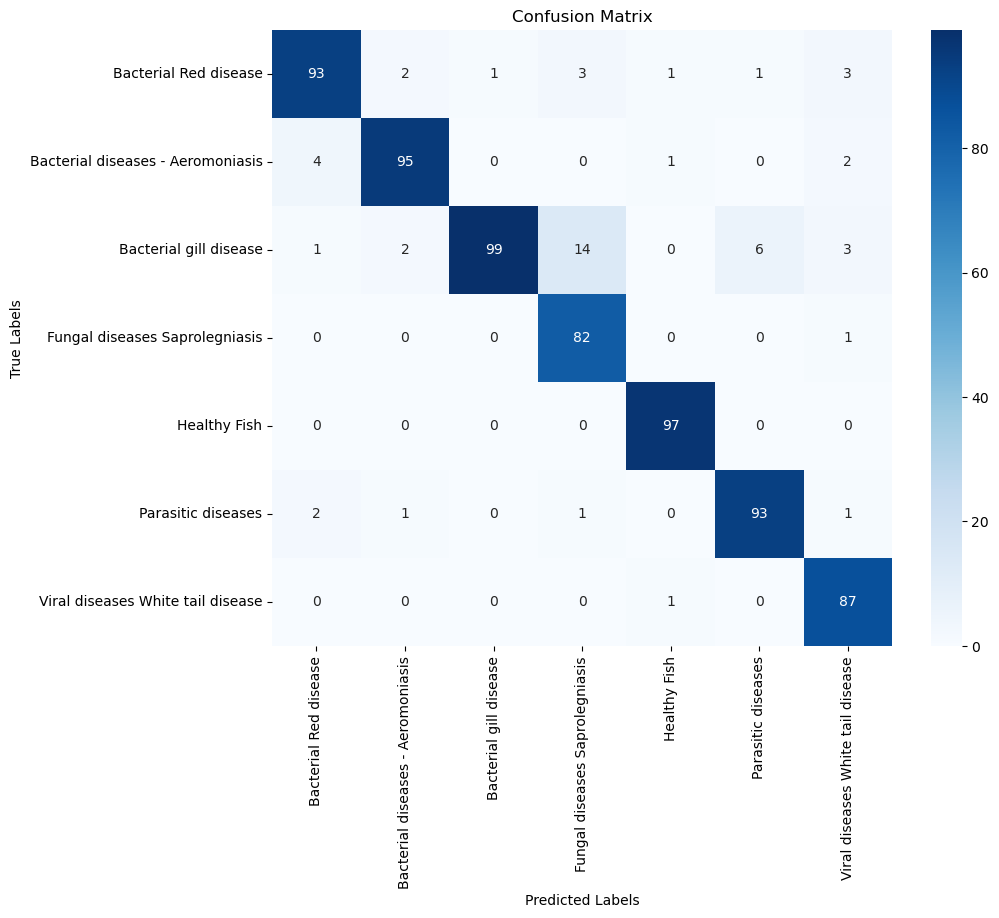

In [74]:
import seaborn as sns
conf_matrix = confusion_matrix(y_pred, test_generator.classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.savefig('Confusion Matrix.png', dpi = 300)
plt.show()

In [76]:
model.save("mobile_net_fish.h5")

In [77]:
import keras
load_model = keras.models.load_model("mobile_net_fish.h5")
load_model.evaluate(test_generator)

22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 625ms/step - accuracy: 0.9424 - loss: 0.1728


[0.2482670396566391, 0.9268292784690857]

### predict one image

In [99]:
import cv2
import tensorflow as tf
import numpy as np
img = cv2.imread(r'E:\BFCAI\2025\Huawei AI Training\session six\dataset\fish\Freshwater Fish Disease Aquaculture in south asia\Test\Bacterial gill disease\Bacterial gill disease (1).jpg')
img = cv2.resize(img,dsize=(224,224),interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
input_arr = tf.keras.preprocessing.image.img_to_array(gray)
input_arr = np.array([input_arr]) 
input_arr = input_arr.astype('float32') / 255.  
predictions = model.predict(input_arr)
print(np.argmax(predictions,axis=1)   ,predictions)
print(np.argmax(predictions,axis=1)   ,predictions[0]*100)
print(np.argmax(predictions,axis=1)   ,predictions[0][1]*100)
print("belong to : ",class_names[np.argmax(predictions,axis=1)[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
[2] [[2.5611331e-07 2.1358157e-06 9.9999022e-01 2.3162270e-06 6.6473882e-11
  1.2427430e-06 3.7897598e-06]]
[2] [2.5611331e-05 2.1358157e-04 9.9999023e+01 2.3162270e-04 6.6473884e-09
 1.2427430e-04 3.7897599e-04]
[2] 0.00021358157482609386
belong to :  Bacterial gill disease


In [97]:
predictions[0]

array([2.5611331e-07, 2.1358157e-06, 9.9999022e-01, 2.3162270e-06,
       6.6473882e-11, 1.2427430e-06, 3.7897598e-06], dtype=float32)

# what about sequence and text data??? can CNN work on it only?